### AdaBoost Classifier
This notebook we will work On AdaBoost Classifier

Adaboost initially selects a training subset randomly then iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline
SEED = 42

In [3]:
# Read processe file
df = pd.read_csv('../data/processed_balanced_transaction.csv')
df.shape

(872136, 34)

#### Lets separate Level and features, Scaled feature



In [4]:
X, y = df.drop(['isFraud'],axis=1), df['isFraud']
# scale the features by standard scaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

#### Split data into train test 
 We are spliting data into train and test with ratio 30%. Means 30% test and 70% train data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)

#### Create an AdaBoost Classifier and fit the model and report accuracy

Let's create the AdaBoost Model using Scikit-learn. AdaBoost uses Decision Tree Classifier as default Classifier.

In [7]:
abc = AdaBoostClassifier(n_estimators=25,
                         learning_rate=1,
                         random_state=0)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)


In [15]:
from sklearn import metrics
target_names = ['Not Fraud', 'Fraud']
print(metrics.classification_report(y_test, y_pred, digits=3, target_names=target_names))

              precision    recall  f1-score   support

   Not Fraud      0.687     0.674     0.680    130734
       Fraud      0.680     0.693     0.687    130907

    accuracy                          0.683    261641
   macro avg      0.684     0.683     0.683    261641
weighted avg      0.684     0.683     0.683    261641



### Observation

- Recall (Sensitivity) -We have got recall of 0.693 which is good for this model as it’s above 0.5.
Precision 
- High precision relates to the low false positive rate. We have got 0.684 precision which is pretty good.

#### Cross validation
we are going to apply k-fold cross-validation.

it will split the original data set into k subsets and use one of the subsets as the testing set and the remaining as the training sets. This process iterated k times until every subset have been used as the testing set. Since 10-fold cross-validation is the most popular one, we are going to use that one.

In [8]:
cv_scores = cross_val_score(abc, X_train, y_train, cv=10)
print('Average score: {}'.format(round(np.mean(cv_scores),3)))


Average score: 0.682


### confusion_matrix for AdaBoost Classification

create a confusion matrix (also known as an error matrix) on AdaBoost predicted model.
For this, we have to import the confusion matrix module from sklearn library which helps us to generate the confusion matrix

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [10]:
y_test00=y_test.replace({0:'Not Fraud',1:'Fraud'})

In [11]:
y_pred_cv00=pd.DataFrame(y_pred).replace({0:'Not Fraud',1:'Fraud'})

Confusion matrix, without normalization
[[88056 42678]
 [40145 90762]]


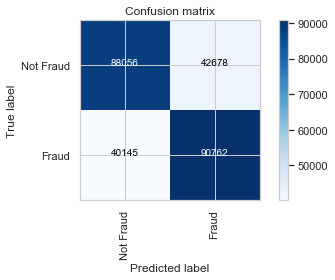

In [14]:
from sklearn import metrics
target_names = ['Not Fraud', 'Fraud']
cnf_matrix = metrics.confusion_matrix(y_test00, y_pred_cv00,labels=target_names)
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

### Observation :
This is a summary of our Adaboost classifier prediction results . 
The number of correct and incorrect predictions are summarized with count values and broken down by each class 'Fraud' and 'Not Fraud'

#### Parameter Tuning

In classification technique, there are some parameters that can be tuned to optimize the classification. 
In AdaBoostClassifier we can tune 

- base_estimator
- n_estimators
- learning_rate

Grid Search explores a range of parameters and finds the best combination of parameters. Then repeat the process several times until the best parameters are discovered. 
lets use grid search to get best params




In [17]:
from sklearn.model_selection import GridSearchCV
#Creating a grid of hyperparameters
grid_params = {    'n_estimators': [25,50]}
#Use GridSearch
abc_grid_search = GridSearchCV(AdaBoostClassifier(), grid_params, cv = 10, n_jobs = -1)

#Fit the model
abc_grid_search.fit(X_train, y_train)
print('Best score: {}'.format(abc_grid_search.best_score_))
print('Best parameters: {}'.format(abc_grid_search.best_params_))

best_abc_classifier = abc_grid_search.best_estimator_

Best score: 0.6884610140839726
Best parameters: {'n_estimators': 50}


### Save best model

In [20]:
import pickle

lookup ={
    1 : 'Fraud', 0:'Not Fraud'
}

pickle.dump(best_abc_classifier, open('../saved_models/dtc_model.pkl','wb'))
model = pickle.load(open('../saved_models/dtc_model.pkl','rb'))

